Import libraries

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.api import SimpleExpSmoothing
import statsmodels.formula.api as smf
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.tsa.arima_model import ARMAResults

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Import Data

In [ ]:
SPTSX = yf.download("^gsptse", start="2020-01-01", end="2021-01-01", intervals="1d")
SPTSX = SPTSX['Adj Close'].pct_change()
SPTSX.name = 'S&P/TSX - Return'
df = SPTSX[1:]

[*********************100%***********************]  1 of 1 completed


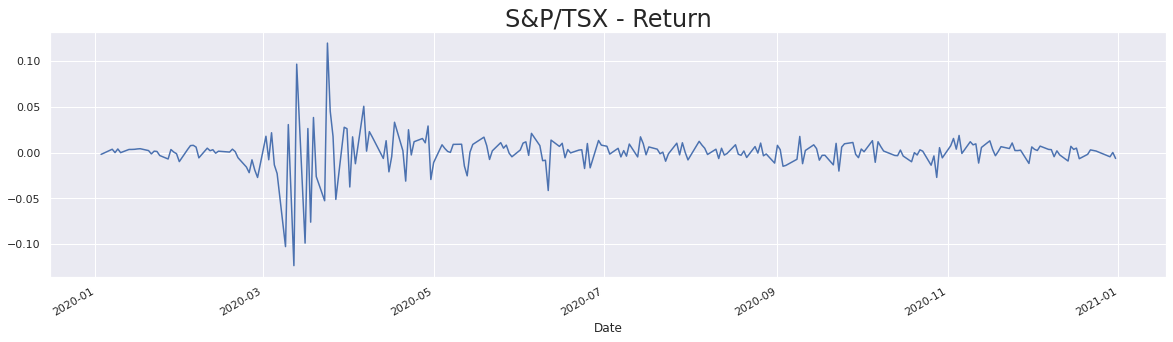

In [ ]:
df.plot(figsize = (20,5))
plt.title("S&P/TSX - Return", size = 24)
plt.show()

Augmented dickey fuller test

In [ ]:
sts.adfuller(df)

(-4.82988423702722,
 4.766151009223407e-05,
 6,
 244,
 {'1%': -3.457437824930831,
  '10%': -2.573122099570008,
  '5%': -2.873459364726563},
 -1174.7526698370002)

# Part a:

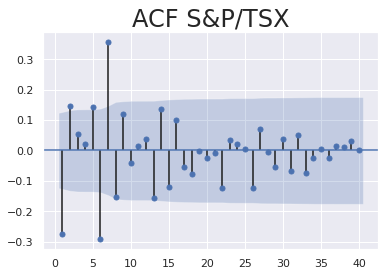

In [ ]:
sgt.plot_acf(df, lags = 40, zero = False)
plt.title("ACF S&P/TSX", size = 24)
plt.show()

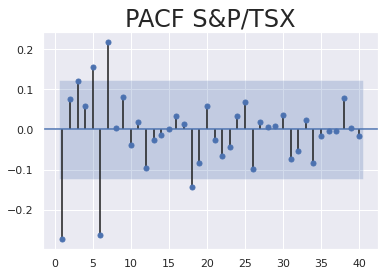

In [ ]:
sgt.plot_pacf(df, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P/TSX", size = 24)
plt.show()

# Part b:

ARMA models

In [ ]:
AIC=[]
BIC=[]
Log_Likelihood = []
AR=[]
MA=[]
is_signif=[] # True if all coefficients (except constant) are significant

In [ ]:
def ARMA_results(data, max_p, max_q):
  for i in range(max_p+1):
    for j in range(max_q+1):
      model=ARMA(df, order = (i,j)).fit()
      AR.append(i)
      MA.append(j)
      AIC.append(model.aic)
      BIC.append(model.bic)
      Log_Likelihood.append(model.llf)
      is_signif.append((model.pvalues[1:]<0.05).all()) # check weather all of the p-values(except constant term) is less than 0.05

In [ ]:
p_max = 5 # maximum number of AR
q_max = 5 # maximum number of MA

In [ ]:
ARMA_results(df, p_max, q_max)

Show ARMA results

In [ ]:
arma_results = pd.DataFrame({
    'AR': AR,
    'MA': MA,
    'AIC': AIC,
    'BIC': BIC,
    'Log Likelihood':Log_Likelihood,
    'Coefficients are significant?': is_signif
})

In [ ]:
arma_results

,AR,MA,AIC,BIC,Log Likelihood,Coefficients are significant?
0,0,0,-1228.231774,-1221.180868,616.115887,True
1,0,1,-1241.668202,-1231.091843,623.834101,True
2,0,2,-1248.077565,-1233.975753,628.038782,True
3,0,3,-1248.793553,-1231.166288,629.396776,False
4,0,4,-1247.155577,-1226.002860,629.577789,False
5,0,5,-1246.971540,-1222.293369,630.485770,False
6,1,0,-1245.776514,-1235.200155,625.888257,True
7,1,1,-1244.542366,-1230.440554,626.271183,False
8,1,2,-1248.697042,-1231.069777,629.348521,False
9,1,3,-1256.469938,-1235.317221,634.234969,False


# Part c:

In [ ]:
arma_results.sort_values(by=['AIC'])

,AR,MA,AIC,BIC,Log Likelihood,Coefficients are significant?
33,5,3,-1273.899024,-1238.644495,646.949512,False
32,5,2,-1272.533062,-1240.803986,645.266531,False
34,5,4,-1271.977277,-1233.197295,646.988639,False
31,5,1,-1271.216034,-1243.012410,643.608017,False
29,4,5,-1271.054578,-1232.274595,646.527289,True
17,2,5,-1270.044784,-1238.315707,644.022392,False
35,5,5,-1269.866557,-1227.561122,646.933279,False
28,4,4,-1266.434413,-1231.179883,643.217206,False
23,3,5,-1266.189830,-1230.935300,643.094915,False
14,2,2,-1265.692019,-1244.539302,638.846010,True


In [ ]:
arma_results.sort_values(by=['BIC'])

,AR,MA,AIC,BIC,Log Likelihood,Coefficients are significant?
14,2,2,-1265.692019,-1244.539302,638.846010,True
31,5,1,-1271.216034,-1243.012410,643.608017,False
32,5,2,-1272.533062,-1240.803986,645.266531,False
33,5,3,-1273.899024,-1238.644495,646.949512,False
19,3,1,-1259.770214,-1238.617497,635.885107,False
17,2,5,-1270.044784,-1238.315707,644.022392,False
21,3,3,-1263.553057,-1235.349433,639.776528,True
9,1,3,-1256.469938,-1235.317221,634.234969,False
6,1,0,-1245.776514,-1235.200155,625.888257,True
20,3,2,-1258.707812,-1234.029642,636.353906,False


In [ ]:
arma_results.sort_values(by=['Log Likelihood'], ascending=False)

,AR,MA,AIC,BIC,Log Likelihood,Coefficients are significant?
34,5,4,-1271.977277,-1233.197295,646.988639,False
33,5,3,-1273.899024,-1238.644495,646.949512,False
35,5,5,-1269.866557,-1227.561122,646.933279,False
29,4,5,-1271.054578,-1232.274595,646.527289,True
32,5,2,-1272.533062,-1240.803986,645.266531,False
17,2,5,-1270.044784,-1238.315707,644.022392,False
31,5,1,-1271.216034,-1243.012410,643.608017,False
28,4,4,-1266.434413,-1231.179883,643.217206,False
23,3,5,-1266.189830,-1230.935300,643.094915,False
22,3,4,-1263.595671,-1231.866595,640.797836,False


ARMA models of (1,0) (0,2) (2,2) (3,3) (4,5) could be chosen.
We should run LLR test to make a decision for the more complex model

## Log likelihood ratio test

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
ARMA_1_0=ARMA(df, order = (1,0)).fit()
ARMA_0_2=ARMA(df, order = (0,2)).fit()
ARMA_2_2=ARMA(df, order = (2,2)).fit()
ARMA_3_3=ARMA(df, order = (3,3)).fit()
ARMA_4_5=ARMA(df, order = (4,5)).fit()

In [ ]:
LLR_test(ARMA_1_0, ARMA_0_2, DF=1)

0.038

In [ ]:
LLR_test(ARMA_0_2, ARMA_2_2, DF=2)

0.0

In [ ]:
LLR_test(ARMA_2_2, ARMA_3_3, DF=2)

0.394

In [ ]:
LLR_test(ARMA_2_2, ARMA_4_5, DF=5)

0.009

## Analysing the residuals

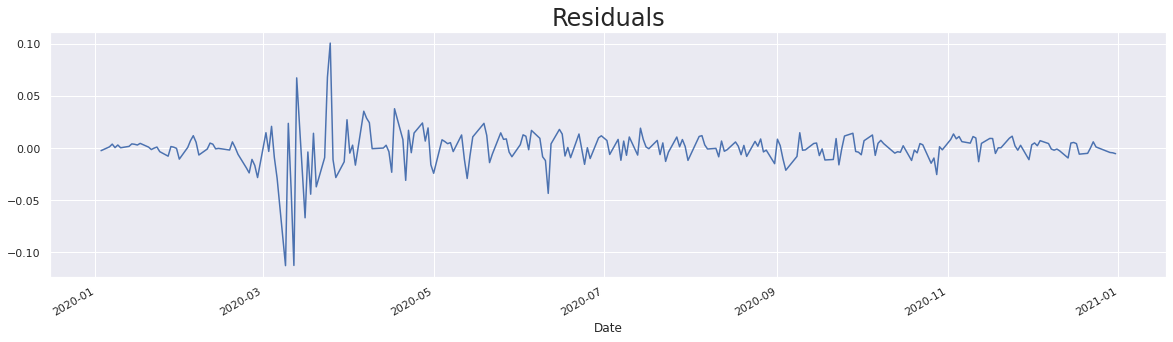

In [ ]:
ARMA_4_5.resid.plot(figsize = (20,5))
plt.title("Residuals", size = 24)
plt.show()

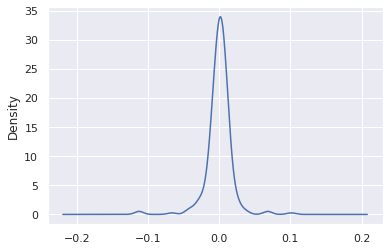

In [ ]:
ARMA_4_5.resid.plot(kind='kde')

ACF of residuals

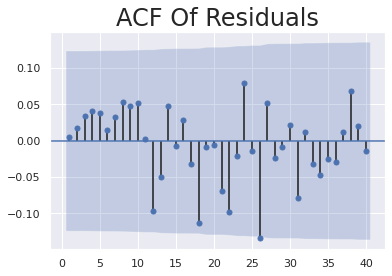

In [ ]:
sgt.plot_acf(ARMA_4_5.resid, zero = False, lags = 40)
plt.title("ACF Of Residuals",size=24)
plt.show()

In [ ]:
sts.adfuller(ARMA_4_5.resid)

(-15.658382187179729,
 1.565052476439772e-28,
 0,
 250,
 {'1%': -3.456780859712, '10%': -2.572968544, '5%': -2.8731715065600003},
 -1186.5000007916206)

# Part d:

## i. ARMA(4,5)

In [ ]:
ARMA_4_5_mse = ((ARMA_4_5.fittedvalues-df)**2).mean()
print('ARMA(4,5) MSE:', ARMA_4_5_mse)

ARMA(4,5) MSE: 0.0003376414844389005


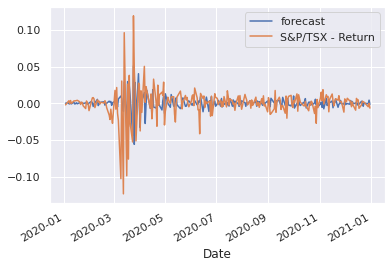

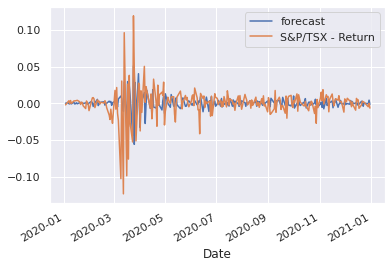

In [ ]:
ARMA_4_5.plot_predict()

## ii. ARMA(4,4)

In [ ]:
ARMA_4_4=ARMA(df, order = (4,4)).fit()

In [ ]:
ARMA_4_4_mse = ((ARMA_4_4.fittedvalues-df)**2).mean()
print('ARMA(4,4) MSE:', ARMA_4_4_mse)

ARMA(4,4) MSE: 0.00034684629221574714


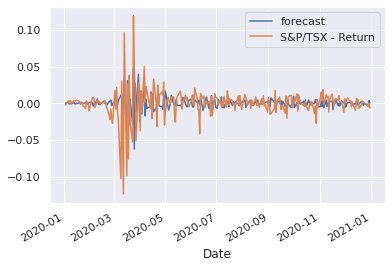

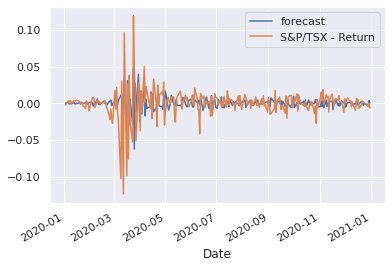

In [ ]:
ARMA_4_4.plot_predict()

## iii. Single exponential smoothing

In [ ]:
exponentialSmoothing = SimpleExpSmoothing(df).fit(smoothing_level=0.5)

In [ ]:
exponentialSmoothing_mse = ((exponentialSmoothing.fittedvalues-df)**2).mean()
print('SimpleExpSmoothing(alpha=0.5) MSE:', exponentialSmoothing_mse)

SimpleExpSmoothing(alpha=0.5) MSE: 0.0006280824645433171


## iv. random walk with drift

Log return

In [ ]:
SPTSX = yf.download("^gsptse", start="2020-01-01", end="2021-01-01", intervals="1d")
df2 = np.log(SPTSX['Adj Close']/SPTSX['Adj Close'].shift())[1:]
df2.name = 'S&P/TSX - LogReturn'

[*********************100%***********************]  1 of 1 completed


In [ ]:
randomWalk = ARMA(df2, order = (0,0)).fit()

In [ ]:
randomWalk_mse = ((randomWalk.fittedvalues-df)**2).mean()
print('random walk (log return) MSE:', randomWalk_mse)

random walk (log return) MSE: 0.0004320127006448818


In [ ]:
randomWalk2 = ARMA(df, order = (0,0)).fit()

In [ ]:
randomWalk2_mse = ((randomWalk2.fittedvalues-df)**2).mean()
print('random walk (simple return) MSE:', randomWalk2_mse)

random walk (simple return) MSE: 0.0004319645633310543


# Part e:

## Previous homework result

In [ ]:
SPTSX = yf.download("^gsptse", start="2020-01-01", end="2021-01-01", intervals="1d")
SPTSX = SPTSX['Adj Close'].pct_change()
SPTSX.name = 'SPTSX'

[*********************100%***********************]  1 of 1 completed


In [ ]:
SP500 = yf.download("^GSPC", start="2020-01-01", end="2021-01-01", intervals="1d")
SP500 = SP500['Adj Close'].pct_change()
SP500.name = 'SP500'

[*********************100%***********************]  1 of 1 completed


In [ ]:
Bitcoin = yf.download("BTC-USD", start="2020-01-01", end="2020-12-31", intervals="1d")
Bitcoin = Bitcoin['Adj Close'].pct_change()
Bitcoin.name = 'Bitcoin'

[*********************100%***********************]  1 of 1 completed


In [ ]:
dd = pd.concat([SPTSX, SP500, Bitcoin], axis=1)

In [ ]:
linear_model = smf.ols(formula='SPTSX ~ SP500 + Bitcoin',
               data=dd,
               missing='drop').fit()

## MSE calculation

In [ ]:
linear_model_mse = linear_model.mse_resid
print('linear model MSE:', linear_model_mse)

linear model MSE: 8.905811445961162e-05
